In [1]:
import re
import numpy as np
import pandas as pd
import jieba
import openpyxl
import nltk
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
jieba.dt.cache_file = 'jieba.cache.lmspeech'

# Pro-imports legislators in Ma era v.s. Anti-imports legislators in Tsai era

Building prefix dict from c:\venv\workspace\source\Text mining\beefnpork.txt ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache.lmspeech
Loading model cost 0.017 seconds.
Prefix dict has been built successfully.


美國 70
牛肉 50
進口 49
開放 30
瘦肉精 30
豬肉 30
談判 23
標示 21
把關 20
衛生署 18


  Terms  Freq.
0    美國     70
1    牛肉     50
2    進口     49
3    開放     30
4   瘦肉精     30
5    豬肉     30
6    談判     23
7    標示     21
8    把關     20
9   衛生署     18
Text(0, 0.5, 'Frequency')


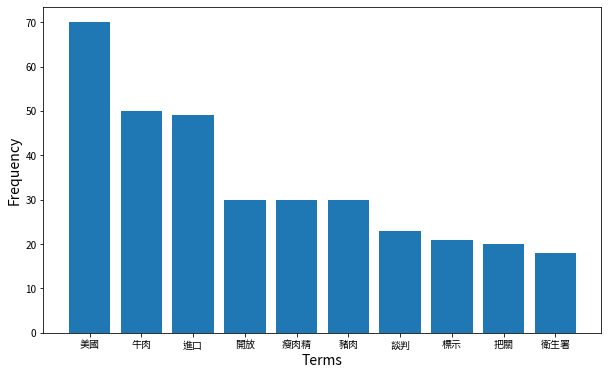

In [2]:
data01 = pd.read_excel("C:/Users/User/Documents/Operation Holy Grail/Phase 4//Data/Pork n beef import/MPSA/proimdisboth_ma.xlsx")
data01.fillna("",inplace=True)
lmspeech_pro = list(data01['text'])
data01.head()

jieba.set_dictionary('beefnpork.txt')
jieba.load_userdict('beefnpork.txt')
with open('stopwords.txt', encoding = 'UTF-8') as f:
    stop_words = f.readlines()
stop_words = [w.replace('\n', '') for w in stop_words]
stop_words = [w.replace(' ', '') for w in stop_words]
rule = re.compile(r"[^\u4e00-\u9fa5]")
lmspeech_pro = [list(jieba.cut(rule.sub('', speech))) for speech in lmspeech_pro]
for idx, speech in enumerate(lmspeech_pro):
    lmspeech_pro[idx] = ' '.join([word for word in speech if word.strip() not in stop_words])
    
swo=pd.DataFrame(columns=['發言內容'], data = lmspeech_pro)
swo.to_excel("test_bnfma.xlsx",encoding='UTF-8')

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(lmspeech_pro)
    bag_of_words = vec.transform(lmspeech_pro)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words_maproim = get_top_n_words(lmspeech_pro, 10)
for word, freq in common_words_maproim:
    print(word, freq)
    
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

ma_proim_plotly = pd.DataFrame(common_words_maproim, columns = ['ReviewText' , 'count'])
ma_proim_plotly.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', xTitle='Terms', yTitle='Count', linecolor='black', title='The 10 most frequent terms of pro-imports legislators in Ma era')

maproim_cwdf = pd.DataFrame(common_words_maproim, columns=['Terms', 'Freq.'])  
print(maproim_cwdf)

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']
plt.rcParams['axes.unicode_minus'] = False

proim_ma_fig = plt.figure(figsize=(10,6))
proim_ma_fig = plt.bar(maproim_cwdf['Terms'], maproim_cwdf['Freq.']) 
proim_ma_fig = plt.xlabel('Terms', fontsize = 14)
proim_ma_fig = plt.ylabel("Frequency", fontsize = 14)
#proim_ma_fig = plt.title("The 10 most frequent terms of pro-imports legislators in Ma era", fontsize = 18)

print(proim_ma_fig)

Building prefix dict from c:\venv\workspace\source\Text mining\beefnpork.txt ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache.lmspeech
Loading model cost 0.006 seconds.
Prefix dict has been built successfully.


美國 222
臺灣 207
進口 204
瘦肉精 184
開放 178
豬肉 158
美豬 139
萊豬 137
健康 130
政府 128


  Terms  Freq.
0    美國    222
1    臺灣    207
2    進口    204
3   瘦肉精    184
4    開放    178
5    豬肉    158
6    美豬    139
7    萊豬    137
8    健康    130
9    政府    128
Text(0, 0.5, 'Frequency')


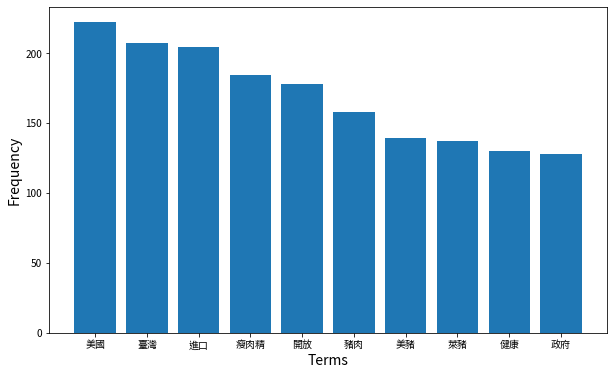

In [3]:
data02 = pd.read_excel("C:/Users/User/Documents/Operation Holy Grail/Phase 4//Data/Pork n beef import/MPSA/antiimdisboth_tsai.xlsx")
data02.fillna("",inplace=True)
lmspeech_anti = list(data02['text'])
data02.head()

jieba.set_dictionary('beefnpork.txt')
jieba.load_userdict('beefnpork.txt')
with open('stopwords.txt', encoding = 'UTF-8') as f:
    stop_words = f.readlines()
stop_words = [w.replace('\n', '') for w in stop_words]
stop_words = [w.replace(' ', '') for w in stop_words]
rule = re.compile(r"[^\u4e00-\u9fa5]")
lmspeech_anti = [list(jieba.cut(rule.sub('', speech))) for speech in lmspeech_anti]
for idx, speech in enumerate(lmspeech_anti):
    lmspeech_anti[idx] = ' '.join([word for word in speech if word.strip() not in stop_words])
    
swo=pd.DataFrame(columns=['發言內容'], data = lmspeech_anti)
swo.to_excel("test_bnfma.xlsx",encoding='UTF-8')

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(lmspeech_anti)
    bag_of_words = vec.transform(lmspeech_anti)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words_tsaiantiim = get_top_n_words(lmspeech_anti, 10)
for word, freq in common_words_tsaiantiim:
    print(word, freq)
    
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

tsai_antiim_plotly = pd.DataFrame(common_words_tsaiantiim, columns = ['ReviewText' , 'count'])
tsai_antiim_plotly.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', xTitle='Terms', yTitle='Count', linecolor='black', title='The 10 most frequent terms of anti-imports legislators in Tsai era')

tsaiantiim_cwdf = pd.DataFrame(common_words_tsaiantiim, columns=['Terms', 'Freq.'])  
print(tsaiantiim_cwdf)

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']
plt.rcParams['axes.unicode_minus'] = False

antiim_tsai_fig = plt.figure(figsize=(10,6))
antiim_tsai_fig = plt.bar(tsaiantiim_cwdf['Terms'], tsaiantiim_cwdf['Freq.'])
antiim_tsai_fig = plt.xlabel('Terms', fontsize = 14)
antiim_tsai_fig = plt.ylabel("Frequency", fontsize = 14)
#plt.title("The 10 most frequent terms of anti-imports legislators in Tsai era", fontsize = 18)

print(antiim_tsai_fig)

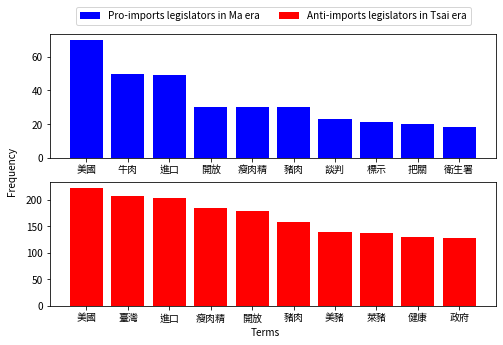

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(8,5))
plt.subplot(2, 1, 1)
proim_ma_fig = plt.bar(maproim_cwdf['Terms'], maproim_cwdf['Freq.'], color = 'blue')
plt.subplot(2, 1, 2)
antiim_tsai_fig = plt.bar(tsaiantiim_cwdf['Terms'], tsaiantiim_cwdf['Freq.'], color = 'red')
#ax.set_xlabel("Terms")
#ax.set_ylabel("Frequency")
fig.text(0.5, 0.05, 'Terms', ha='center', va='center')
fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')
fig.legend(handles=[proim_ma_fig, antiim_tsai_fig], labels=['Pro-imports legislators in Ma era', 'Anti-imports legislators in Tsai era'], 
           bbox_to_anchor=[0.865, 0.97], ncol=2)
plt.savefig('imdisbothwordfreq_mapro.png', dpi=300)

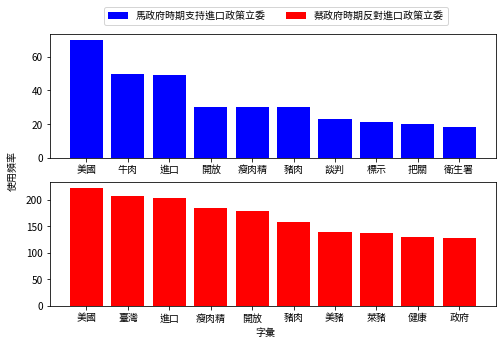

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(8,5))
plt.subplot(2, 1, 1)
proim_ma_fig = plt.bar(maproim_cwdf['Terms'], maproim_cwdf['Freq.'], color = 'blue')
plt.subplot(2, 1, 2)
antiim_tsai_fig = plt.bar(tsaiantiim_cwdf['Terms'], tsaiantiim_cwdf['Freq.'], color = 'red')
#ax.set_xlabel("Terms")
#ax.set_ylabel("Frequency")
fig.text(0.5, 0.05, '字彙', ha='center', va='center')
fig.text(0.06, 0.5, '使用頻率', ha='center', va='center', rotation='vertical')
fig.legend(handles=[proim_ma_fig, antiim_tsai_fig], labels=['馬政府時期支持進口政策立委', '蔡政府時期反對進口政策立委'], 
           bbox_to_anchor=[0.825, 0.97], ncol=2)
plt.savefig('imdisbothwordfreq_mapro_zhtw.png', dpi=300)

# Anti-imports legislators in Ma era v.s. Pro-imports legislators in Tsai era

Building prefix dict from c:\venv\workspace\source\Text mining\beefnpork.txt ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache.lmspeech
Loading model cost 0.004 seconds.
Prefix dict has been built successfully.


美國 363
瘦肉精 255
牛肉 231
進口 218
臺灣 172
開放 118
政府 114
談判 112
健康 100
國人 100


  Terms  Freq.
0    美國    363
1   瘦肉精    255
2    牛肉    231
3    進口    218
4    臺灣    172
5    開放    118
6    政府    114
7    談判    112
8    健康    100
9    國人    100
Text(0, 0.5, 'Frequency')


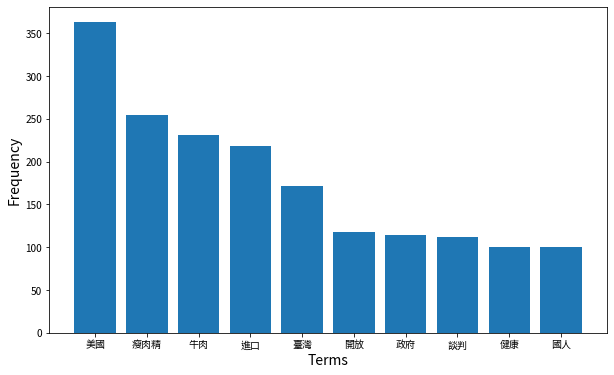

In [6]:
data03 = pd.read_excel("C:/Users/User/Documents/Operation Holy Grail/Phase 4//Data/Pork n beef import/MPSA/antiimdisboth_ma.xlsx")
data03.fillna("",inplace=True)
lmspeech_anti = list(data03['text'])
data03.head()

jieba.set_dictionary('beefnpork.txt')
jieba.load_userdict('beefnpork.txt')
with open('stopwords.txt', encoding = 'UTF-8') as f:
    stop_words = f.readlines()
stop_words = [w.replace('\n', '') for w in stop_words]
stop_words = [w.replace(' ', '') for w in stop_words]
rule = re.compile(r"[^\u4e00-\u9fa5]")
lmspeech_anti = [list(jieba.cut(rule.sub('', speech))) for speech in lmspeech_anti]
for idx, speech in enumerate(lmspeech_anti):
    lmspeech_anti[idx] = ' '.join([word for word in speech if word.strip() not in stop_words])
    
swo=pd.DataFrame(columns=['發言內容'], data = lmspeech_anti)
swo.to_excel("test_bnfma.xlsx",encoding='UTF-8')

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(lmspeech_anti)
    bag_of_words = vec.transform(lmspeech_anti)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words_maantiim = get_top_n_words(lmspeech_anti, 10)
for word, freq in common_words_maantiim:
    print(word, freq)
    
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

ma_antiim_plotly = pd.DataFrame(common_words_maantiim, columns = ['ReviewText' , 'count'])
ma_antiim_plotly.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', xTitle='Terms', yTitle='Count', linecolor='black', title='The 10 most frequent terms of anti-imports legislators in Ma era')

maantiim_cwdf = pd.DataFrame(common_words_maantiim, columns=['Terms', 'Freq.'])  
print(maantiim_cwdf)

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']
plt.rcParams['axes.unicode_minus'] = False

antiim_ma_fig = plt.figure(figsize=(10,6))
antiim_ma_fig = plt.bar(maantiim_cwdf['Terms'], maantiim_cwdf['Freq.'])
antiim_ma_fig = plt.xlabel('Terms', fontsize = 14)
antiim_ma_fig = plt.ylabel("Frequency", fontsize = 14)
#plt.title("The 10 most frequent terms of anti-imports legislators in Ma era", fontsize = 18)

print(antiim_ma_fig)

Building prefix dict from c:\venv\workspace\source\Text mining\beefnpork.txt ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache.lmspeech
Loading model cost 0.007 seconds.
Prefix dict has been built successfully.


臺灣 56
進口 50
豬肉 50
程序 49
食品 38
美國 34
標示 30
優先 29
萊克多巴胺 28
發言 28


   Terms  Freq.
0     臺灣     56
1     進口     50
2     豬肉     50
3     程序     49
4     食品     38
5     美國     34
6     標示     30
7     優先     29
8  萊克多巴胺     28
9     發言     28
Text(0, 0.5, 'Frequency')


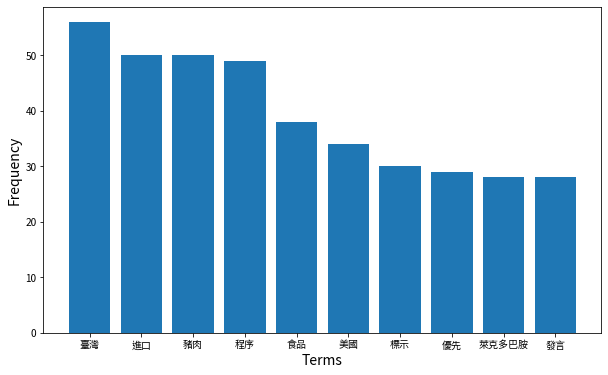

In [7]:
data04 = pd.read_excel("C:/Users/User/Documents/Operation Holy Grail/Phase 4//Data/Pork n beef import/MPSA/proimdisboth_tsai.xlsx")
data04.fillna("",inplace=True)
lmspeech_pro = list(data04['text'])
data04.head()

jieba.set_dictionary('beefnpork.txt')
jieba.load_userdict('beefnpork.txt')
with open('stopwords.txt', encoding = 'UTF-8') as f:
    stop_words = f.readlines()
stop_words = [w.replace('\n', '') for w in stop_words]
stop_words = [w.replace(' ', '') for w in stop_words]
rule = re.compile(r"[^\u4e00-\u9fa5]")
lmspeech_pro = [list(jieba.cut(rule.sub('', speech))) for speech in lmspeech_pro]
for idx, speech in enumerate(lmspeech_pro):
    lmspeech_pro[idx] = ' '.join([word for word in speech if word.strip() not in stop_words])
    
swo=pd.DataFrame(columns=['發言內容'], data = lmspeech_pro)
swo.to_excel("test_bnfma.xlsx",encoding='UTF-8')

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(lmspeech_pro)
    bag_of_words = vec.transform(lmspeech_pro)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words_tsaiproim = get_top_n_words(lmspeech_pro, 10)
for word, freq in common_words_tsaiproim:
    print(word, freq)
    
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

tsai_proim_plotly = pd.DataFrame(common_words_tsaiproim, columns = ['ReviewText' , 'count'])
tsai_proim_plotly.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', xTitle='Terms', yTitle='Count', linecolor='black', title='The 10 most frequent terms of pro-imports legislators in Tsai era')

tsaiproim_cwdf = pd.DataFrame(common_words_tsaiproim, columns=['Terms', 'Freq.'])  
print(tsaiproim_cwdf)

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']
plt.rcParams['axes.unicode_minus'] = False

proim_tsai_fig = plt.figure(figsize=(10,6))
proim_tsai_fig = plt.bar(tsaiproim_cwdf['Terms'], tsaiproim_cwdf['Freq.']) 
proim_tsai_fig = plt.xlabel('Terms', fontsize = 14)
proim_tsai_fig = plt.ylabel("Frequency", fontsize = 14)
#proim_ma_fig = plt.title("The 10 most frequent terms of pro-imports legislators in Tsai era", fontsize = 18)

print(proim_tsai_fig)

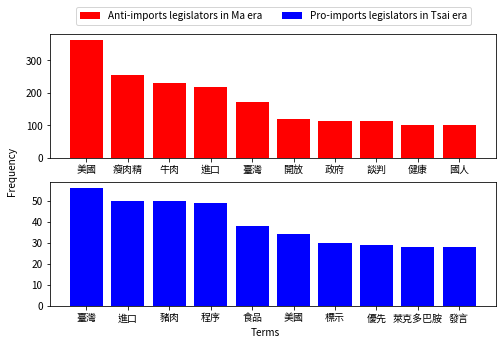

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(8,5))
plt.subplot(2, 1, 1)
antiim_ma_fig = plt.bar(maantiim_cwdf['Terms'], maantiim_cwdf['Freq.'], color = 'red')
plt.subplot(2, 1, 2)
proim_tsai_fig = plt.bar(tsaiproim_cwdf['Terms'], tsaiproim_cwdf['Freq.'], color = 'blue')
#ax.set_xlabel("Terms")
#ax.set_ylabel("Frequency")
fig.text(0.5, 0.05, 'Terms', ha='center', va='center')
fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical')
fig.legend(handles=[antiim_ma_fig, proim_tsai_fig], labels=['Anti-imports legislators in Ma era', 'Pro-imports legislators in Tsai era'], 
           bbox_to_anchor=[0.865, 0.97], ncol=2)
plt.savefig('imdisbothwordfreq_tsaipro.png', dpi=300)

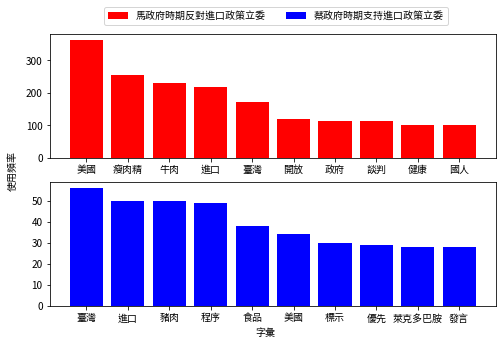

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(8,5))
plt.subplot(2, 1, 1)
antiim_ma_fig = plt.bar(maantiim_cwdf['Terms'], maantiim_cwdf['Freq.'], color = 'red')
plt.subplot(2, 1, 2)
proim_tsai_fig = plt.bar(tsaiproim_cwdf['Terms'], tsaiproim_cwdf['Freq.'], color = 'blue')
#ax.set_xlabel("Terms")
#ax.set_ylabel("Frequency")
fig.text(0.5, 0.05, '字彙', ha='center', va='center')
fig.text(0.06, 0.5, '使用頻率', ha='center', va='center', rotation='vertical')
fig.legend(handles=[antiim_ma_fig, proim_tsai_fig], labels=['馬政府時期反對進口政策立委', '蔡政府時期支持進口政策立委'], 
           bbox_to_anchor=[0.825, 0.97], ncol=2)
plt.savefig('imdisbothwordfreq_tsaipro_zhtw.png', dpi=300)

In [10]:
#from matplotlib import font_manager
#font_set = {f.name for f in font_manager.fontManager.ttflist}
#for f in font_set:
    #print(f)